In [1]:
%matplotlib inline

import pickle
from core import *

read_stats =  pickle.load( open( "pickles/main_20_100.pckl", "rb" ) )

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
samples = analysis_set["main"]

for sample in samples:
    acc = 1 - np.sum(read_stats[sample]["metrics"], axis = 1)
    indexes = np.where((read_stats[sample]["n_clips"][:, 1] > 50) & (read_stats[sample]["n_clips"][:, 1] < 130))[0]
    print(sample, indexes.shape[0] / read_stats[sample]["n_clips"].shape[0])
    print(np.median(read_stats[sample]["acc"]), np.median(read_stats[sample]["metrics"], axis = 0), np.median(read_stats[sample]["original_read_length"]), np.median(read_stats[sample]["aligned_read_length"]))
    print(np.median(read_stats[sample]["acc"][indexes]), np.median(read_stats[sample]["metrics"][indexes], axis = 0), np.median(read_stats[sample]["original_read_length"][indexes]), np.median(read_stats[sample]["aligned_read_length"][indexes]))

Human 0.29796833035103504
0.900990099009901 [0.02680965 0.0257732  0.04466859] 923.0 876.0
0.9029126213592233 [0.02538071 0.02434077 0.04536862] 988.0 893.0
Human_IVT 0.22028621741610654
0.9155629139072847 [0.02158273 0.02246377 0.03860072] 534.0 486.0
0.9166666666666666 [0.02043796 0.02094768 0.03990025] 597.0 490.0
Mouse 0.1066673260906598
0.8777292576419214 [0.03556851 0.02543353 0.05936073] 644.0 616.0
0.8784648187633263 [0.03377386 0.02439024 0.06113537] 703.0 605.0
Zebrafish 0.4153474324607481
0.8666666666666667 [0.03694969 0.02005013 0.07329121] 904.0 839.0
0.865979381443299 [0.03677758 0.01946903 0.07479019] 962.0 865.0
C. elegans 0.17146350474112906
0.9150625782646058 [0.02040816 0.01944444 0.0438293 ] 723.0 688.0
0.9119496855345912 [0.02040816 0.01925224 0.04652071] 807.5 709.0
Arabidopsis 0.23907282606437752
0.9113573407202216 [0.02155689 0.02070064 0.04518072] 914.0 878.0
0.91015625 [0.02112676 0.02054795 0.04633205] 967.0 871.0
H. volcanii 0.32628276943759804
0.90531224655

Human [24408453. 54880403.]
Human 0.29796833035103504


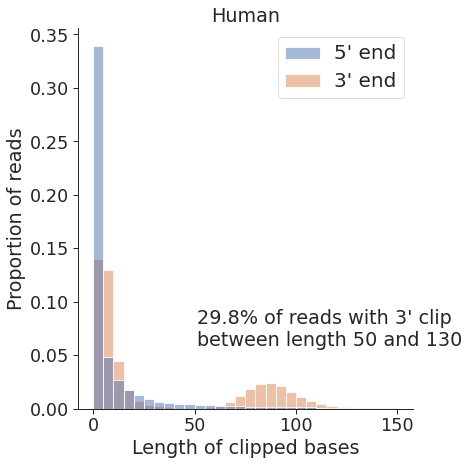

Human_IVT [38116134. 79234209.]
Human_IVT 0.22028621741610654


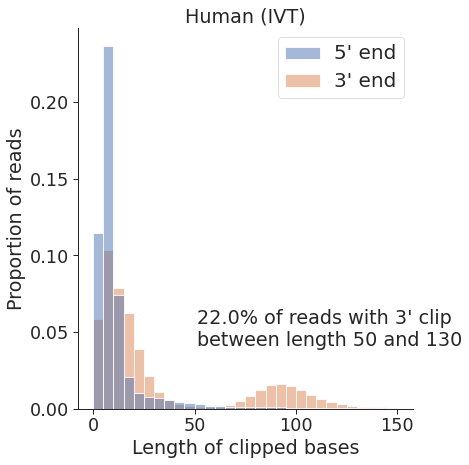

Mouse [2298295. 3210837.]
Mouse 0.1066673260906598


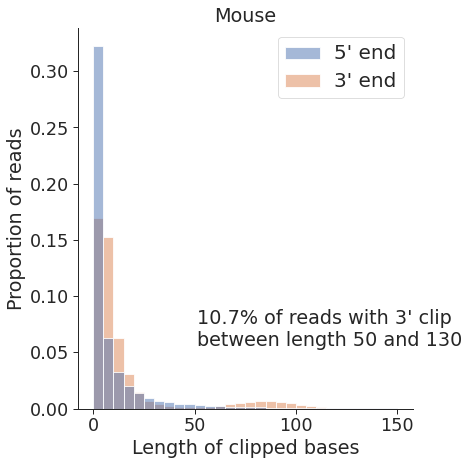

Zebrafish [ 5417059. 29848763.]
Zebrafish 0.4153474324607481


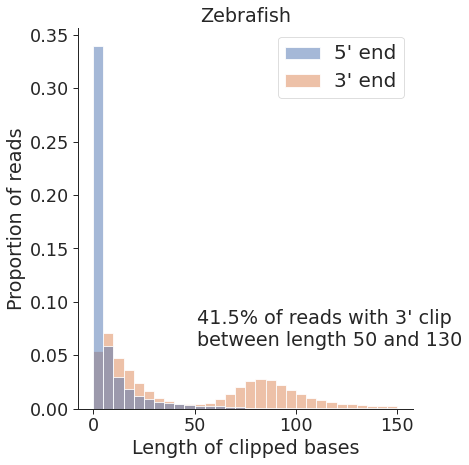

C. elegans [2030719. 5533477.]
C. elegans 0.17146350474112906


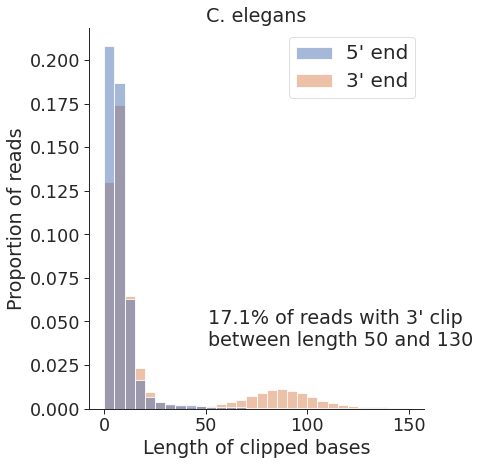

Arabidopsis [12375781. 34236614.]
Arabidopsis 0.23907282606437752


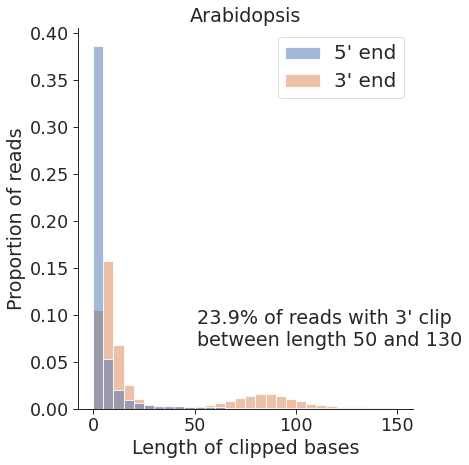

H. volcanii [ 82396. 778877.]
H. volcanii 0.32628276943759804


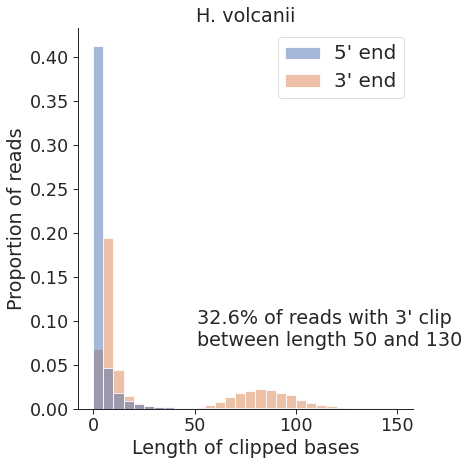

E. coli [1620934. 6062868.]
E. coli 0.2385713133919213


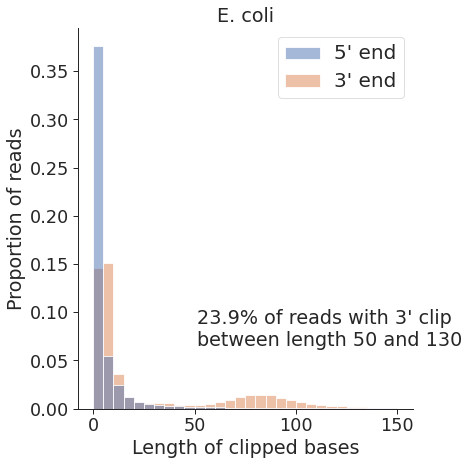

shortRNAs_IVT [ 200307. 1942262.]
shortRNAs_IVT 0.39062361197477125


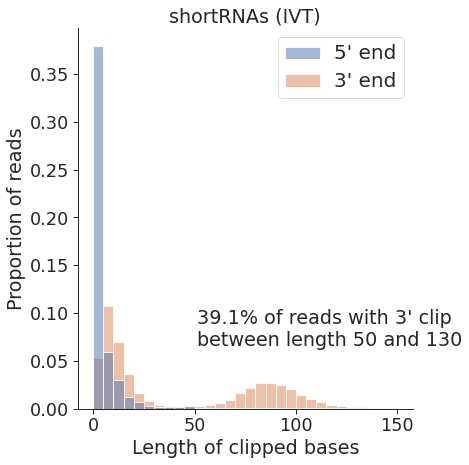

Yeast [ 1475012. 14049665.]
Yeast 0.3545887980202469


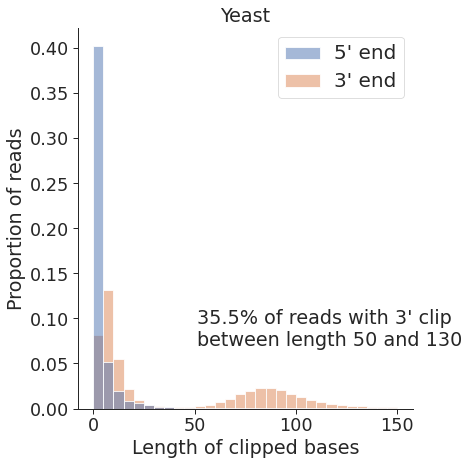

SARS2 [10693176. 20704983.]
SARS2 0.32634325389587493


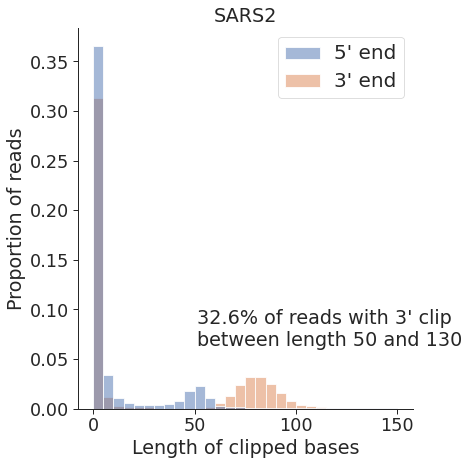

SARS2_IVT [3.35888540e+07 1.05832449e+08]
SARS2_IVT 0.3608004713733497


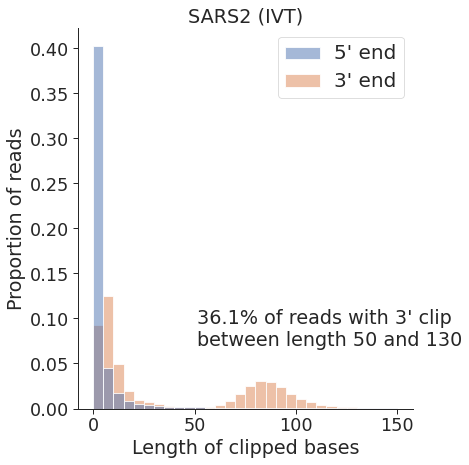

In [33]:
l, h = 50, 130
for sample in samples:
    fig, ax = plt.subplots()
    sns.set(rc = {'figure.figsize': (6, 7)})   
    sns.set_context("paper", font_scale = 2)
    sns.set_style("ticks")
    sns.despine()
    print(sample, np.sum(read_stats[sample]["n_clips"], axis = 0))
    indexes = np.where((read_stats[sample]["n_clips"][:, 1] > l) & (read_stats[sample]["n_clips"][:, 1] < h))[0]
    _, fail_rate = indexes.shape[0], indexes.shape[0] / read_stats[sample]["n_clips"].shape[0]
    print(sample, fail_rate)
    x = read_stats[sample]["n_clips"].flatten(order = "F")
    hue = ["5\' end"] * read_stats[sample]["n_clips"].shape[0] + ["3\' end"] * read_stats[sample]["n_clips"].shape[0]
    g = sns.histplot(x = x, hue = hue, binwidth=5, binrange = (0, 150),
                    stat = 'probability')
    sns.despine()
    plt.setp(g.get_legend().get_texts(), fontsize = '20')
    plt.xlabel("Length of clipped bases"), plt.ylabel("Proportion of reads")
    plt.title(sample.replace("_IVT", " (IVT)"))
    fig.text(0.40, 0.25, "{:.1f}% of reads with 3' clip \nbetween length {} and {}".format(fail_rate*100, l, h))
    plt.savefig("images/adapter/53clip_counts_" + sample.replace(". ", ""), bbox_inches = "tight")
    plt.show()

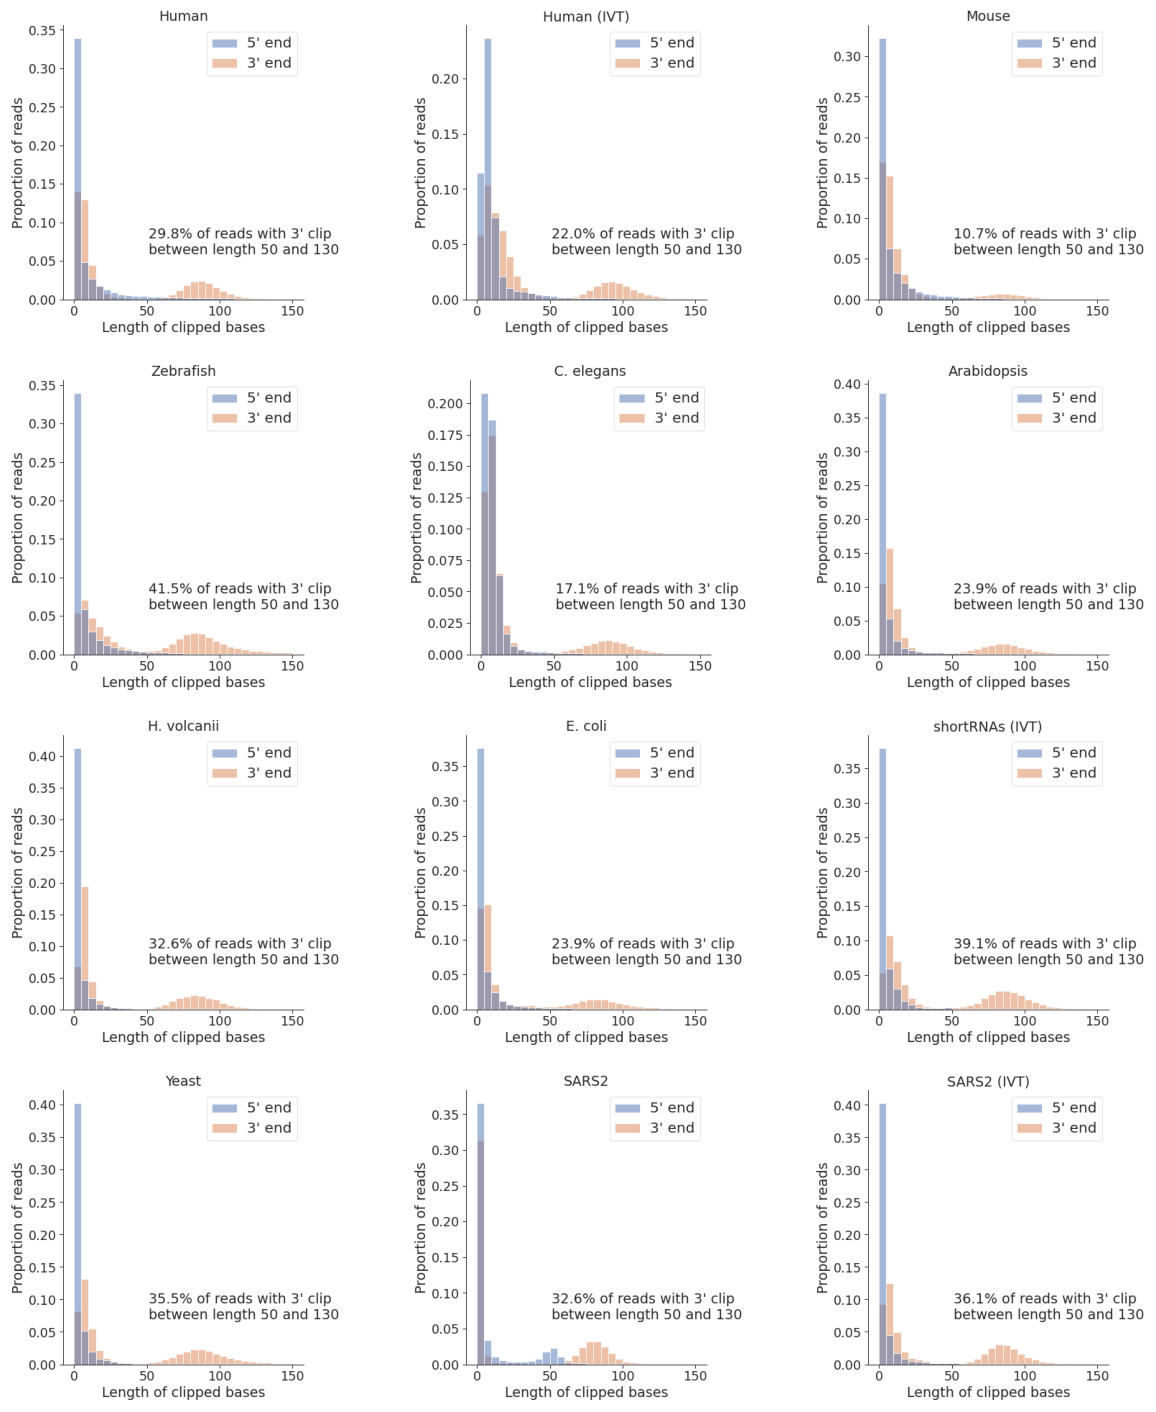

In [35]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes[-1, -1].axis("off")
axes[-1, -2].axis("off")
row, col = 0, 0
for sample in samples:
    img = mpimg.imread("images/adapter/53clip_counts_" + str(sample).replace(". ", "") + ".png")
    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    fig.tight_layout()
    
    col += 1
    if col == 3:
        row += 1
        col = 0
fig.tight_layout()
plt.savefig("images/adapter/53clip_counts_all", bbox_inches = "tight")
plt.show()